# NOAA Temperature Analysis

### Q1. Familiarize yourself with the dataset, then write some python code that returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

                 ID        Date Element  Data_Value
0       USW00094889  2014-11-12    TMAX          22
1       USC00208972  2009-04-29    TMIN          56
2       USC00200032  2008-05-26    TMAX         278
3       USC00205563  2005-11-11    TMAX         139
4       USC00200230  2014-02-27    TMAX        -106
...             ...         ...     ...         ...
165080  USC00205822  2015-06-09    TMAX         256
165081  USC00205822  2009-10-06    TMAX         167
165082  USC00205050  2014-07-14    TMAX         283
165083  USC00200230  2006-11-29    TMIN         117
165084  USC00207312  2006-09-04    TMIN         111

[165085 rows x 4 columns]


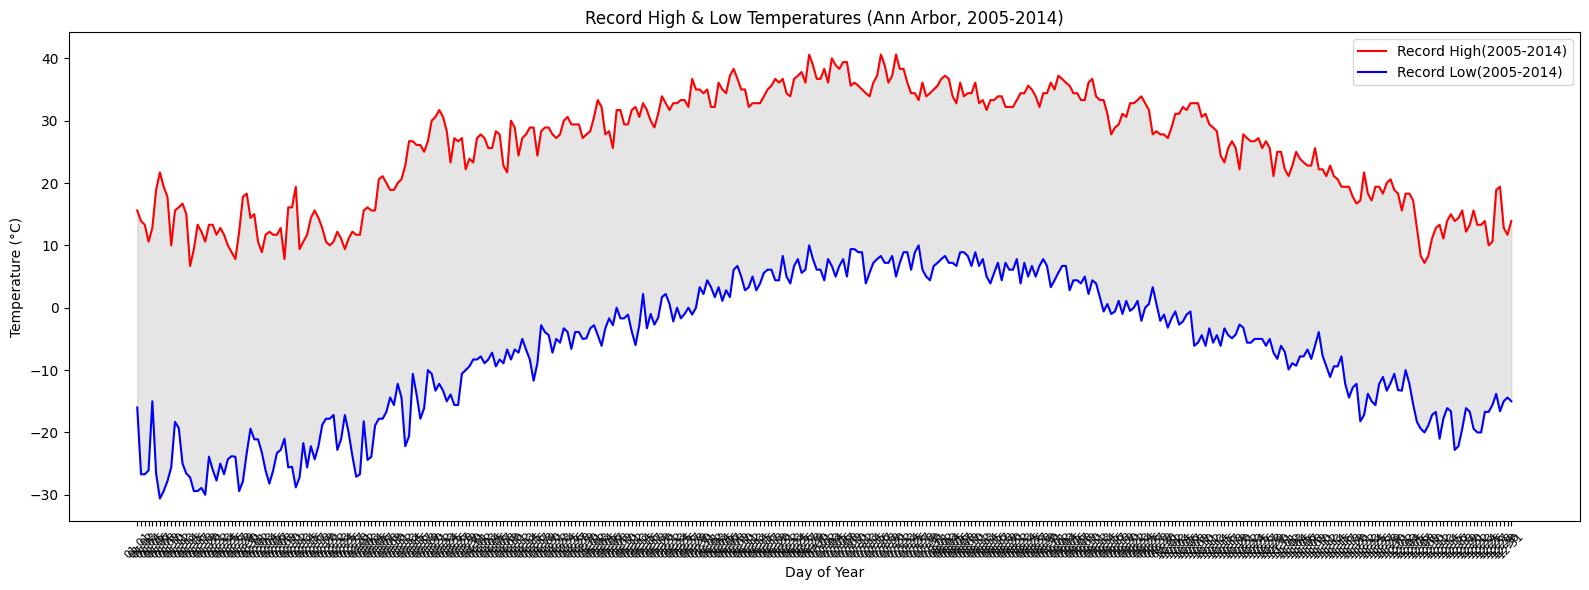

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data
df=pd.read_csv('temperature.csv')
print(df)
df['Date']=pd.to_datetime(df['Date'])

#Filter for getting decade(2005-2014) and remove Feb 29
decade= df[(df['Date'].dt.year>=2005)& (df['Date'].dt.year<=2014)]
decade= decade[~((decade['Date'].dt.month==2) & (decade['Date'].dt.day==29))]

#Create day of the year column
decade['day_of_year']=decade['Date'].dt.strftime('%m-%d')

#Compute record high/low temperatures by day of the year
record_high = decade[decade['Element']=='TMAX'].groupby('day_of_year')['Data_Value'].max()
record_low = decade[decade['Element']=='TMIN'].groupby('day_of_year')['Data_Value'].min()

#Plot record highs and lows as a line graph using matplotlib
plt.figure(figsize=(16,6))
plt.plot(record_high.index, record_high.values/10, 'r-', label='Record High(2005-2014)')
plt.plot(record_low.index, record_low.values/10, 'b-', label='Record Low(2005-2014)')
#Shading between both curves
plt.fill_between(record_high.index, record_low.values/10, record_high.values/10, color='grey', alpha=0.2)
plt.title('Record High & Low Temperatures (Ann Arbor, 2005-2014)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

Note:
Loaded the dataset, familiarized it and converted dates for easy filtering  
Filtered data for the years 2005 to 2014  
Romoved February 29(leap days) to keep day counts consistent for yearly comparison    
Extracted day of year (month-day format) to aggregate data across years by calendar day    
Grouped data by day and temperature element to find record highs and lows for each day  
Plotted the record high and low temperature lines to visualize temperature extremes by day      
Shaded the area between the two lines to highlight the daily temperature range   
Used clear labels, legend, and rotated x-axis for readability while avoiding chart clutter

### Q2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten-year record (2005-2014) record high or record low was broken in 2015.

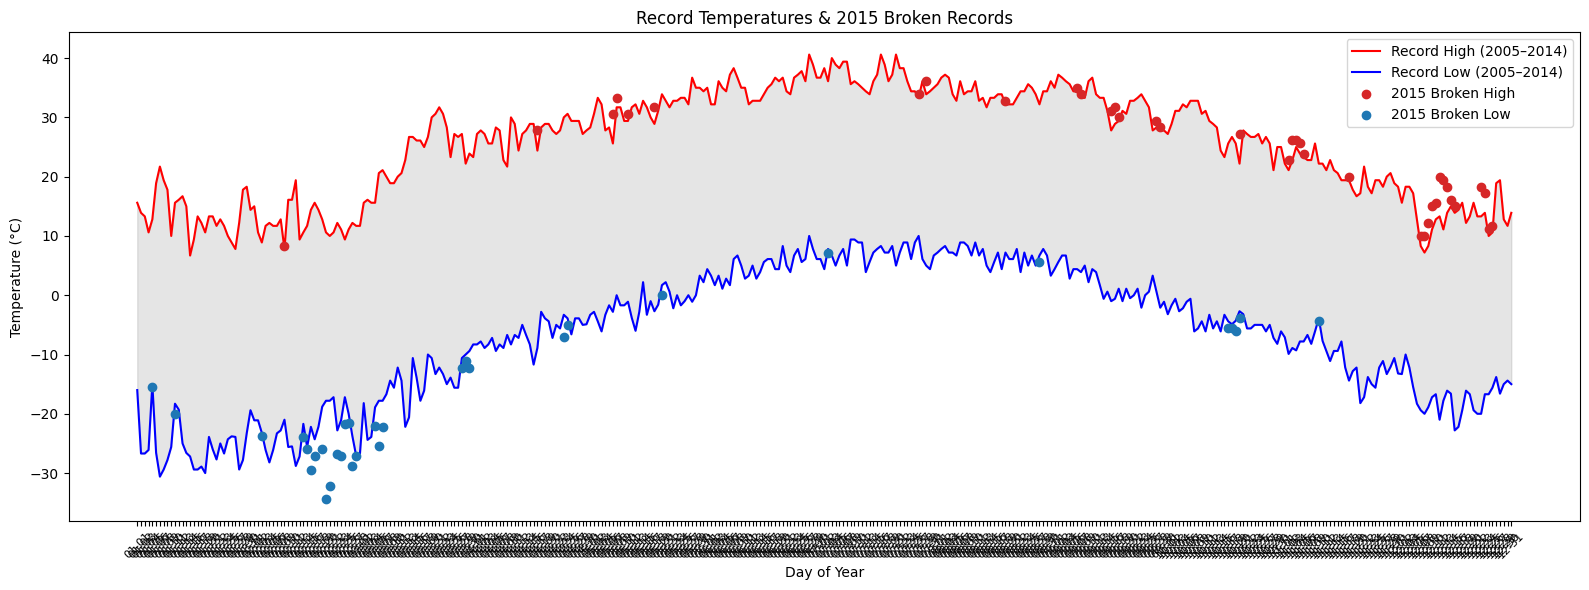

In [19]:
#Filter the 2015 data, ignore Feb 29
year2015=df[df['Date'].dt.year==2015]
year2015 = year2015[~((year2015['Date'].dt.month == 2) & (year2015['Date'].dt.day == 29))]
year2015['day_of_year'] = year2015['Date'].dt.strftime('%m-%d')

#Compare each day's high/low against the previous records, and overlay any broken records
high_2015=year2015[year2015['Element']=='TMAX'].groupby('day_of_year')['Data_Value'].max()
low_2015=year2015[year2015['Element']=='TMIN'].groupby('day_of_year')['Data_Value'].min()

broken_high= high_2015[high_2015 > record_high]
broken_low= low_2015[low_2015 < record_low]

#Overlay on previous plot
plt.figure(figsize=(16,6))
plt.plot(record_high.index, record_high.values/10, 'r-', label='Record High (2005–2014)')
plt.plot(record_low.index, record_low.values/10, 'b-', label='Record Low (2005–2014)')
plt.fill_between(record_high.index, record_low.values/10, record_high.values/10, color='grey', alpha=0.2)
plt.scatter(broken_high.index, broken_high.values/10, color='tab:red', label='2015 Broken High', zorder=5)
plt.scatter(broken_low.index, broken_low.values/10, color='tab:blue', label='2015 Broken Low', zorder=5)
plt.title('Record Temperatures & 2015 Broken Records')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

Note: 
Filtered 2015 data and removed leap days for consistent comparison   
Computed daily highs and lows for 2015   
Identified days where 2015 values broke previous decade records   
Overlaid these record-breaking points as scatter plots on the record lines to highlight significant changes

### Q5. The data you have been given is near **Ann Arbor, Michigan, United States**, and visualize on a map the stations in the data.

In [ ]:
import folium

stations = pd.read_csv('BinSize.csv')
ann_arbor_coords = [42.2808, -83.7430]

my_map = folium.Map(location=ann_arbor_coords, zoom_start=8)
for i, row in stations.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=row['id']).add_to(my_map)

# Save output (view in browser)
my_map.save("stations_ann_arbor_map.html")


Note:
Loaded station metadata with latitude/longitude  
Used folium to plot stations interactively on a map centered near Ann Arbor   
Each station marked with a popup showing station ID for easy identification

### Q6. Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).

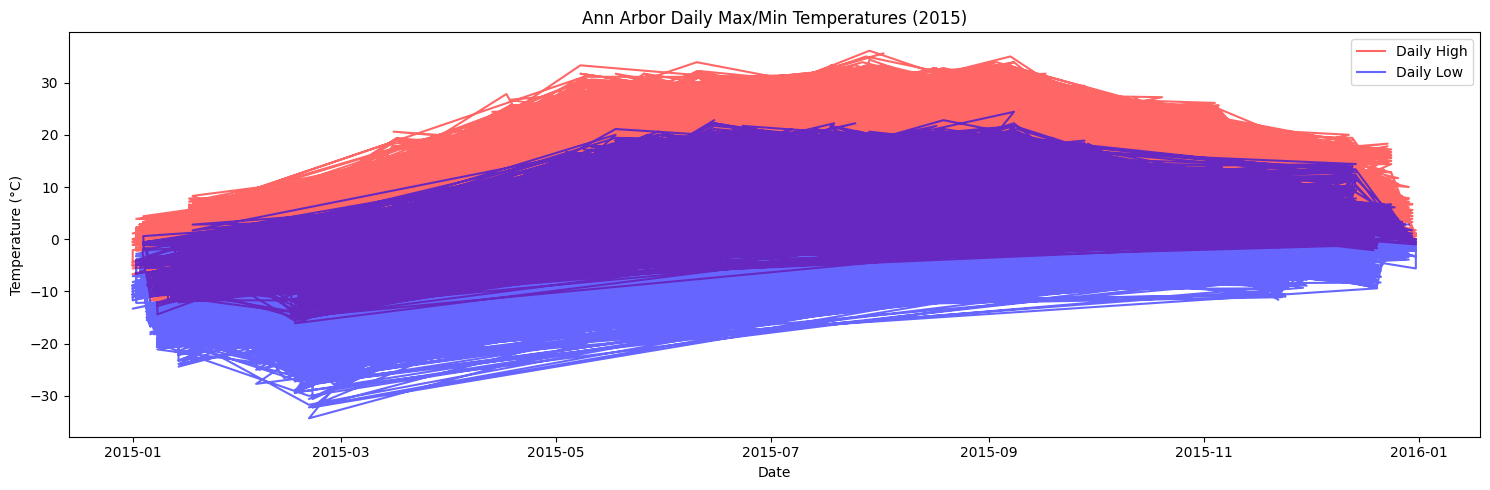

In [27]:
ann_arbor_2015 = year2015.copy()
plt.figure(figsize=(15,5))

#We plot daily highs and lows for the period 2015
plt.plot(ann_arbor_2015[ann_arbor_2015['Element']=='TMAX']['Date'],
         ann_arbor_2015[ann_arbor_2015['Element']=='TMAX']['Data_Value']/10,
         color='red', alpha=0.6, label='Daily High')
plt.plot(ann_arbor_2015[ann_arbor_2015['Element']=='TMIN']['Date'],
         ann_arbor_2015[ann_arbor_2015['Element']=='TMIN']['Data_Value']/10,
         color='blue', alpha=0.6, label='Daily Low')
plt.title('Ann Arbor Daily Max/Min Temperatures (2015)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


Note:
Plotted daily maximum and minimum temperatures for 2015 to give an overall view of the year’s temperature trends   
Used distinct colors and labels for highs and lows   
Provided clear axis labels and title for context

Used modules   
pandas: Powerful for handling large tables, filtering rows and grouping data   
matplotlib: For  drawing  line/scatter plot and shading between curves   
folium: Easiest way for interactive mapping in Python